In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer
import requests
import json
#!pip install tweepy
import tweepy
import re
import wordcloud

In [83]:
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [3]:
with open("image_predictions.tsv", mode = "wb" ) as file:
    file.write(response.content)

In [5]:
archived_tweets = pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
consumer_key = "aGf5prkwBcZaL443EoBBT5aC2"
consumer_secret = "dcJDeKB6I1nl4pK1XY0zxLqZ7Ifjq11jYlxwseDlFgugm3M5KR"
access_token = "1023365788844142592-GZO537wewh3R3KpALboaFUsfPyfIgo"
access_secret = "oWMuDvA7uk33CabNOUUIehhVNkVyykQhWZEK4HKX4lXNI"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in archived_tweets.tweet_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [47]:
# with open('tweet_json.txt', encoding='utf-8') as file:
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file.readlines():
        line = json.loads(line)
        print(line.keys())
        break

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [6]:
tweet_data = []

with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file.readlines():
        line = json.loads(line)
        day_created = line['created_at'][:3]
        tweet_id = line['id']
        text = line['full_text']
        retweet_count = line['retweet_count']
        favorite_count = line['favorite_count']
        
        tweet_data.append({'tweet_id':tweet_id, 'weekday':day_created, 
                          'tweet':text, 'retweet_count':retweet_count,
                          'favorite_count':favorite_count})

        
tweet_data = pd.DataFrame(tweet_data, columns=['tweet_id', 'weekday', 'tweet',
                                 'retweet_count', 'favorite_count'])
        

In [7]:
tweet_data.head()

tweet_id weekday  \
0  892420643555336193     Tue   
1  892177421306343426     Tue   
2  891815181378084864     Mon   
3  891689557279858688     Sun   
4  891327558926688256     Sat   

                                               tweet  retweet_count  \
0  This is Phineas. He's a mystical boy. Only eve...           7001   
1  This is Tilly. She's just checking pup on you....           5300   
2  This is Archie. He is a rare Norwegian Pouncin...           3477   
3  This is Darla. She commenced a snooze mid meal...           7224   
4  This is Franklin. He would like you to stop ca...           7754   

   favorite_count  
0           33804  
1           29317  
2           22043  
3           36926  
4           35306

In [8]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\\t', engine = 'python')

image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

## Assess

In [58]:
pd.set_option('display.max_colwidth', None)

In [10]:
archived_tweets

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                                                  source  \
0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
...                                                                                  ...   
2351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2353  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2354  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2355  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                    text  \
0                                                          This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1     This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                      This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                                This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4     This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
...                                                                                                                                                                  ...   
2351                                            Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   
2352                           This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
2353                                  Here is a very happy pup. Big fan of we

* Doggo, floofer, pupper and puppo are different stages of dogs and should be in one column
* Some dogs names are invalid. Example 'a'
* The tweets sources in `source` are embedded in a url
* Missing values in `names`, `doggo`, `floofer`, `pupper` and `puppo` are represented as None instead of NaN


In [11]:
archived_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

* `tweet_id` should be string object while  `timestamp`, and `retweeted_status_timestamp` should be datetime objects
* Some columns have missing data

In [12]:
archived_tweets.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

* The maximum value of `rating_numerator` and `rating_denominator` is outrageous`

In [13]:
archived_tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [14]:
archived_tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
archived_tweets.query('rating_numerator == 0')[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

tweet_id  \
315   835152434251116546   
1016  746906459439529985   

                                                                                                                         text  \
315         When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag   
1016  PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX   

      rating_numerator  rating_denominator  
315                  0                  10  
1016                 0                  10

* It appears that the rating was 0/10 indeed for the first while the second wasn't a dog's picture.

In [16]:
archived_tweets.query('rating_numerator > 14')[['tweet_id','text','rating_numerator', 'rating_denominator']]

tweet_id  \
55    881633300179243008   
188   855862651834028034   
189   855860136149123072   
285   838916489579200512   
290   838150277551247360   
291   838085839343206401   
313   835246439529840640   
340   832215909146226688   
433   820690176645140481   
516   810984652412424192   
695   786709082849828864   
763   778027034220126208   
902   758467244762497024   
979   749981277374128128   
1120  731156023742988288   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1634  684225744407494656   
1635  684222868335505415   
1663  682808988178739200   
1712  680494726643068929   
1779  677716515794329600   
1843  675853064436391936   
2074  670842764863651840   

                                                                                                                                                                           text  \
55                                                                                  @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s   
188                                                                                      @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research   
189                                       @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   
285                                                                             RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI   
290                                                                                                                                                          @markhoppus 182/10   
291                                                                                                             @bragg6of8 @Andy_Pace_ we are still looking for the first 15/10   
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
340                                RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
695                                            This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763           This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
979                                                                                              This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://

In [17]:
archived_tweets.query('rating_denominator < 10')[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

tweet_id  \
313   835246439529840640   
516   810984652412424192   
2335  666287406224695296   

                                                                                                                                                                           text  \
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
2335                                   This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

      rating_numerator  rating_denominator  
313                960                   0  
516                 24                   7  
2335                 1                   2

In [18]:
archived_tweets.query('rating_denominator > 10')[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

tweet_id  \
342   832088576586297345   
433   820690176645140481   
784   775096608509886464   
902   758467244762497024   
1068  740373189193256964   
1120  731156023742988288   
1165  722974582966214656   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1598  686035780142297088   
1634  684225744407494656   
1635  684222868335505415   
1662  682962037429899265   
1663  682808988178739200   
1779  677716515794329600   
1843  675853064436391936   

                                                                                                                                                    text  \
342                                                                                                             @docmisterio account started on 11/15/15   
433                                                  The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
784         RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…   
902                                                                       Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
1068        After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                           Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                               This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                       Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                        Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                  Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                        Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1598            Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating   
1634                      Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   
1635        Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1662         This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
1663         I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible   
1779                                                                              IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1843                                         Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   

      rating_numerator  rating_denominator  
342                 11                  15  
433                 84                  70  
784            

* Some of the ratings seem valid. Examples are those with index number 185, 285 etc.
* Others are incorrect. It appears that some ratings are in decimals and only the digits after the . were recorded while some are cummulative ratings of more than one dog.
* Some digits extracted as ratings were not ratings. An example is the rating with index 516 which was referencing 24/7 and index 342 which was referencing 9/11 as a date

In [19]:
pd.set_option('display.max_row',None)

In [20]:
archived_tweets['name'].sort_values()

1035              Abby
1021              Abby
938                Ace
1933              Acro
1327             Adele
1934             Aiden
77                 Aja
480              Akumi
820                 Al
875             Albert
1954            Albert
144              Albus
412              Albus
1115           Aldrick
2046         Alejandro
374          Alexander
1189      Alexanderson
486                Alf
2238             Alfie
661              Alfie
367              Alfie
1616             Alfie
858              Alfie
51                Alfy
201              Alice
1701             Alice
1495             Amber
1334           Ambrose
2078               Amy
2195            Amélie
780             Anakin
574             Anakin
2144             Andru
2084              Andy
849              Angel
443               Anna
2063           Anthony
2088            Antony
1687            Apollo
1059              Aqua
1169            Archie
1462            Archie
1400            Archie
2          

* There are some invalid names such as O, a, actually, all, an, getting, by, his, incredibly, infuriating, just, life, light, mad, my, not, officially, old, one, quite, space, such, the, this, unacceptable, very 
* There is inconsistency in the naming, some were written in lowercase while others were in Sentence case
* Missing names were represented as None instead of NaN

In [21]:
wierd_names = ['O', 'a', 'actually', 'all', 'an', 'getting', 'by',
               'his', 'incredibly', 'infuriating', 'just', 'life',
               'light', 'mad', 'my', 'not', 'officially', 'old', 
               'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very']


for names in wierd_names:
    print(archived_tweets.loc[archived_tweets['name'] == names, ['text', 'name']])

                                                                                                                      text  \
775  This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC   

    name  
775    O  
                                                                                                                                                             text  \
56    Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF   
649                              Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq   
801                  Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn   
1002                 This is a mighty rare blue-tailed hammer she

* The dog with name O real name's O'Malley
* The name of some dogs were not included in the tweet, just the type of dog while other dog's name were mentioned after 'named'
* Some of the tweets were not dogs 


In [22]:
archived_tweets['expanded_urls'].duplicated().sum()

137

* There are 137 duplicated urls

In [23]:
archived_tweets[~archived_tweets['retweeted_status_id'].isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
74    878316110768087041                    NaN                  NaN   
78    877611172832227328                    NaN                  NaN   
91    874434818259525634                    NaN                  NaN   
95    873697596434513921                    NaN                  NaN   
97    873337748698140672                    NaN                  NaN   
101   872668790621863937                    NaN                  NaN   
109   871166179821445120                    NaN                  NaN   
118   869988702071779329                    NaN                  NaN   
124   868639477480148993                    NaN                  NaN   
130   867072653475098625                    NaN                  NaN   
132   866816280283807744                    NaN                  NaN   
137   866094527597207552                    NaN                  NaN   
146   863471782782697472                    NaN                  NaN   
155   861769973181624320                    NaN                  NaN   
159   860981674716409858                    NaN                  NaN   
160   860924035999428608                    NaN                  NaN   
165   860177593139703809                    NaN                  NaN   
171   858860390427611136                    NaN                  NaN   
180   857062103051644929                    NaN                  NaN   
182   856602993587888130                    NaN                  NaN   
185   856330835276025856                    NaN                  NaN   
194   855245323840757760                    NaN                  NaN   
195   855138241867124737                    NaN                  NaN   
204   852936405516943360                    NaN                  NaN   
211   851953902622658560                    NaN                  NaN   
212   851861385021730816                    NaN                  NaN   
222   849668094696017920                    NaN                  NaN   
230   847978865427394560                    NaN                  NaN   
231   847971574464610304                    NaN                  NaN   
247   845459076796616705                    NaN                  NaN   
250   845098359547420673                    NaN                  NaN   
260   842892208864923648                    NaN                  NaN   
266   841833993020538882                    NaN                  NaN   
272   840761248237133825                    NaN                  NaN   
273   840728873075638272                    NaN                  NaN   
281   839290600511926273                    NaN                  NaN   
285   838916489579200512                    NaN                  NaN   
286   838831947270979586                    NaN                  NaN   
289   838201503651401729                    NaN                  NaN   
298   837012587749474308                    NaN                  NaN   
302   836648853927522308                    NaN                  NaN   
303   836397794269200385                    NaN                  NaN   
307   835685285446955009                    NaN                  NaN   
309   835536468978302976                    NaN                  NaN   
310   835309094223372289                    NaN                  NaN   
319   834477809192075265                    NaN                  NaN   
327   833732339549220864                    NaN                  NaN   
332   832769181346996225                    NaN                  NaN   
340   832215909146226688                    NaN                  NaN   
341   832215726631055365                    NaN         

### Tweet data using twitter API

In [24]:
tweet_data

tweet_id weekday  \
0     892420643555336193     Tue   
1     892177421306343426     Tue   
2     891815181378084864     Mon   
3     891689557279858688     Sun   
4     891327558926688256     Sat   
5     891087950875897856     Sat   
6     890971913173991426     Fri   
7     890729181411237888     Fri   
8     890609185150312448     Thu   
9     890240255349198849     Wed   
10    890006608113172480     Wed   
11    889880896479866881     Tue   
12    889665388333682689     Tue   
13    889638837579907072     Tue   
14    889531135344209921     Mon   
15    889278841981685760     Mon   
16    888917238123831296     Sun   
17    888804989199671297     Sat   
18    888554962724278272     Sat   
19    888078434458587136     Thu   
20    887705289381826560     Wed   
21    887517139158093824     Wed   
22    887473957103951883     Wed   
23    887343217045368832     Tue   
24    887101392804085760     Tue   
25    886983233522544640     Mon   
26    886736880519319552     Sun   
27    886680336477933568     Sun   
28    886366144734445568     Sat   
29    886267009285017600     Sat   
30    886258384151887873     Sat   
31    886054160059072513     Sat   
32    885984800019947520     Fri   
33    885528943205470208     Thu   
34    885518971528720385     Thu   
35    885311592912609280     Thu   
36    885167619883638784     Wed   
37    884925521741709313     Wed   
38    884876753390489601     Tue   
39    884562892145688576     Tue   
40    884441805382717440     Mon   
41    884247878851493888     Mon   
42    884162670584377345     Sun   
43    883838122936631299     Sun   
44    883482846933004288     Sat   
45    883360690899218434     Fri   
46    883117836046086144     Fri   
47    882992080364220416     Thu   
48    882762694511734784     Thu   
49    882627270321602560     Wed   
50    882268110199369728     Tue   
51    882045870035918850     Tue   
52    881906580714921986     Mon   
53    881666595344535552     Mon   
54    881633300179243008     Sun   
55    881536004380872706     Sun   
56    881268444196462592     Sat   
57    880935762899988482     Fri   
58    880872448815771648     Fri   
59    880465832366813184     Thu   
60    880221127280381952     Thu   
61    880095782870896641     Wed   
62    879862464715927552     Wed   
63    879674319642796034     Tue   
64    879492040517615616     Tue   
65    879415818425184262     Mon   
66    879376492567855104     Mon   
67    879130579576475649     Mon   
68    879050749262655488     Sun   
69    879008229531029506     Sun   
70    878776093423087618     Sun   
71    878604707211726852     Sat   
72    878404777348136964     Sat   
73    878316110768087041     Fri   
74    878281511006478336     Fri   
75    878057613040115712     Fri   
76    877736472329191424     Thu   
77    877611172832227328     Wed   
78    877556246731214848     Wed   
79    877316821321428993     Wed   
80    877201837425926144     Tue   
81    876838120628539392     Mon   
82    876537666061221889     Sun   
83    876484053909872640     Sun   
84    876120275196170240     Sat   
85    875747767867523072     Fri   
86    875144289856114688     Thu   
87    875097192612077568     Wed   
88    875021211251597312     Wed   
89    874680097055178752     Tue   
90    874434818259525634     Tue   
91    874296783580663808     Mon   
92    874057562936811520     Mon   
93    874012996292530176     Sun   
94    873580283840344065     Sat   
95    873337748698140672     Sat   
96    873213775632977920     Fri   
97    872967104147763200     Fri   
98    872820683541237760     Thu   
99    872620804844003328     Thu   
100   872486979161796608     Wed   
101   872122724285648897     Tue   
102   871879754684805121     Tue   
103   871762521631449091     Mon   
104   871515927908634625     Sun   
105   871166179821445120     Sun   
106   871102520638267392     Sat   
107   871032628920680449     Sat   
108   870804317367881728     Sat   
109   870726314365509632     Fri   
110   87065631783646

* The days of the week are included in the `date_created`

In [25]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2326 non-null   int64 
 1   weekday         2326 non-null   object
 2   tweet           2326 non-null   object
 3   retweet_count   2326 non-null   int64 
 4   favorite_count  2326 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 91.0+ KB


* `tweet_id` is an integer instead of a string
* `date_created` is a string object instead of a datetime object

In [26]:
tweet_data.describe()

tweet_id  retweet_count  favorite_count
count  2.326000e+03    2326.000000     2326.000000
mean   7.418235e+17    2470.688306     7054.483233
std    6.820671e+16    4183.390772    10960.462784
min    6.660209e+17       1.000000        0.000000
25%    6.782612e+17     494.500000     1228.250000
50%    7.180382e+17    1149.000000     3051.000000
75%    7.986600e+17    2860.000000     8605.750000
max    8.924206e+17   70693.000000   144825.000000

In [27]:
tweet_data.duplicated().any()

False

### Image predictions data

In [28]:
image_predictions

tweet_id  \
0     666020888022790149   
1     666029285002620928   
2     666033412701032449   
3     666044226329800704   
4     666049248165822465   
5     666050758794694657   
6     666051853826850816   
7     666055525042405380   
8     666057090499244032   
9     666058600524156928   
10    666063827256086533   
11    666071193221509120   
12    666073100786774016   
13    666082916733198337   
14    666094000022159362   
15    666099513787052032   
16    666102155909144576   
17    666104133288665088   
18    666268910803644416   
19    666273097616637952   
20    666287406224695296   
21    666293911632134144   
22    666337882303524864   
23    666345417576210432   
24    666353288456101888   
25    666362758909284353   
26    666373753744588802   
27    666396247373291520   
28    666407126856765440   
29    666411507551481857   
30    666418789513326592   
31    666421158376562688   
32    666428276349472768   
33    666430724426358785   
34    666435652385423360   
35    666437273139982337   
36    666447344410484738   
37    666454714377183233   
38    666644823164719104   
39    666649482315059201   
40    666691418707132416   
41    666701168228331520   
42    666739327293083650   
43    666776908487630848   
44    666781792255496192   
45    666786068205871104   
46    666804364988780544   
47    666817836334096384   
48    666826780179869698   
49    666835007768551424   
50    666837028449972224   
51    666983947667116034   
52    666996132027977728   
53    667012601033924608   
54    667044094246576128   
55    667062181243039745   
56    667065535570550784   
57    667073648344346624   
58    667090893657276420   
59    667119796878725120   
60    667138269671505920   
61    667152164079423490   
62    667160273090932737   
63    667165590075940865   
64    667171260800061440   
65    667174963120574464   
66    667176164155375616   
67    667177989038297088   
68    667182792070062081   
69    667188689915760640   
70    667192066997374976   
71    667200525029539841   
72    667211855547486208   
73    667369227918143488   
74    667393430834667520   
75    667405339315146752   
76    667435689202614272   
77    667437278097252352   
78    667443425659232256   
79    667453023279554560   
80    667455448082227200   
81    667470559035432960   
82    667491009379606528   
83    667495797102141441   
84    667502640335572993   
85    667509364010450944   
86    667517642048163840   
87    667524857454854144   
88    667530908589760512   
89    667534815156183040   
90    667538891197542400   
91    667544320556335104   
92    667546741521195010   
93    667549055577362432   
94    667550882905632768   
95    667550904950915073   
96    667724302356258817   
97    667728196545200128   
98    667766675769573376   
99    667773195014021121   
100   667782464991965184   
101   667793409583771648   
102   667801013445750784   
103   667806454573760512   
104   667832474953625600   
105   667861340749471744   
106   667866724293877760   
107   667873844930215936   
108   667878741721415682   
109   667885044254572545   
110   667886921285246976   
111   667902449697558528   
112   667911425562669056   
113   667915453470232577   
114   667924896115245057   
115   667937095915278337   
116   668113020489474048   
117   668142349051129856   
118   668154635664932864   
119   668171859951755264   
120   668190681446379520   
121   668204964695683073   
122   668221241640230912   
123   668226093875376128   
124   668237644992782336   
125   668248472370458624   
126   668256321989451776   
127   668268907921326080   
128   668274247790391296   
129   668286279830867968   
130   668291999406125056   
131   668297328638447616   
132   668466899341221888   
133   668480044826800133   
134   668484198282485761   
135   668496999348633600   
136   668507509523615744   
137   668528771708952576   
138   668537837512433665   
139   668542336805281792   
140   668544745690562560   
141   668567822092664832   
142   668614

In [29]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* `tweet_id` has incorrect data type

In [30]:
image_predictions.duplicated().any()

False

* Some tweets are not original tweets but retweets
* archived_tweets and tweet_data should be merged to become one dataset
* Some tweets do not have images

## Clean

In [31]:
# make copies of the data
archived_clean = archived_tweets.copy()
tweets_clean = tweet_data.copy()
image_clean = image_predictions.copy()

- Doggo, floofer, pupper and puppo are different stages of dogs and should be in one column
- Some dogs names are invalid. Example 'a'
- The tweets sources in source are embedded in a url
- Missing values in names, doggo, floofer, pupper and puppo are represented as None instead of NaN
- tweet_id should be string object while timestamp, and retweeted_status_timestamp should be datetime objects
- Some columns have missing data
- The maximum value of rating_numerator and rating_denominator is outrageous
- Some of the ratings seem valid. Examples are those with index number 185, 285 etc.
- Others are incorrect. It appears that some ratings are in decimals and only the digits after the . were recorded while some are cummulative ratings of more than one dog.
- Some digits extracted as ratings were not ratings. An example is the rating with index 516 which was referencing 24/7 and index 342 which was referencing 9/11 as a date
- There are some invalid names such as O, a, actually, all, an, getting, by, his, incredibly, infuriating, just, life, light, mad, my, not, officially, old, one, quite, space, such, the, this, unacceptable, very
- There is inconsistency in the naming, some were written in lowercase while others were in Sentence case
- Missing names were represented as None instead of NaN
- The dog with name O real name's O'Malley
- The name of some dogs were not included in the tweet, just the type of dog while other dog's name were mentioned after 'named'
- Some of the tweets were not dogs

**Define**

Extract dog stages from tweet and put in a new column `dog_stage` and thereafter, drop the `doggo`, `floofer`, `pupper` and `puppo` columns

**Code**

In [32]:
archived_clean['dog_stage'] = archived_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

columns = ['doggo', 'floofer', 'pupper', 'puppo']

archived_clean.drop(columns, axis = 1, inplace = True)

**Test**

In [33]:
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

In [34]:
archived_clean['dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

**Define**

Extract tweet source embedded in url

**Code**

In [35]:
archived_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [36]:
archived_clean['source'] = archived_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archived_clean['source'] = archived_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
archived_clean['source'] = archived_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archived_clean['source'] = archived_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'tweetdeck')

C:\Users\HP\AppData\Local\Temp\ipykernel_6872\1444407660.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  archived_clean['source'] = archived_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
C:\Users\HP\AppData\Local\Temp\ipykernel_6872\1444407660.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  archived_clean['source'] = archived_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
C:\Users\HP\AppData\Local\Temp\ipykernel_6872\1444407660.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  archived_clean['source'] = archived_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
C:\Users\HP\AppData\Local\Temp\ipykernel_

**Test**

In [37]:
archived_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
tweetdeck                11
Name: source, dtype: int64

**Define**

Merge the three datasets to one dataset

**Code**

In [38]:
archived_clean_merge = pd.merge(left=archived_clean, right=tweets_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [39]:
merge_data = archived_clean_merge.merge(image_clean, on='tweet_id', how='inner')

**Test**

In [40]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2056 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2056 non-null   object 
 4   source                      2056 non-null   object 
 5   text                        2056 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2056 non-null   object 
 10  rating_numerator            2056 non-null   int64  
 11  rating_denominator          2056 non-null   int64  
 12  name                        2056 non-null   object 
 13  dog_stage                   334 n

**Define**

change the `tweet_id`, `in_reply_to_status_id`, and `in_reply_to_user_id` to string, `retweeted_status_timestamp` and `timestamp` to datetime and `dog_stage` to category object.

**Code**

In [41]:
merge_data['tweet_id'] = merge_data['tweet_id'].astype('str')
merge_data['in_reply_to_status_id'] = merge_data['in_reply_to_status_id'].astype('str')
merge_data['in_reply_to_user_id'] = merge_data['in_reply_to_user_id'].astype('str')
merge_data['retweeted_status_timestamp'] = pd.to_datetime(merge_data['retweeted_status_timestamp'])
merge_data['timestamp'] = pd.to_datetime(merge_data['timestamp'])
merge_data['dog_stage'] = merge_data['dog_stage'].astype('category')

**Test**

In [42]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2056 non-null   object             
 1   in_reply_to_status_id       2056 non-null   object             
 2   in_reply_to_user_id         2056 non-null   object             
 3   timestamp                   2056 non-null   datetime64[ns, UTC]
 4   source                      2056 non-null   object             
 5   text                        2056 non-null   object             
 6   retweeted_status_id         71 non-null     float64            
 7   retweeted_status_user_id    71 non-null     float64            
 8   retweeted_status_timestamp  71 non-null     datetime64[ns, UTC]
 9   expanded_urls               2056 non-null   object             
 10  rating_numerator            2056 non-null   int64           

**Define**

Remove retweets from the data

**Code**

In [43]:
merge_data = merge_data[merge_data['retweeted_status_id'].isnull()]

**Test**

In [44]:
merge_data['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

**Define**

Drop empty columns such as `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`

**Code**

In [45]:
col_to_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
merge_data.drop(col_to_drop, axis = 1, inplace =True)

**Test**

In [46]:
merge_data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'weekday', 'tweet',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

**Define**

Drop data(rows) that do not have images

**Code**

In [47]:
merge_data.dropna(subset=['expanded_urls'], inplace = True)

**Test**

In [48]:
merge_data['expanded_urls'].isnull().any()

False

In [49]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2055
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1985 non-null   object             
 1   in_reply_to_status_id  1985 non-null   object             
 2   in_reply_to_user_id    1985 non-null   object             
 3   timestamp              1985 non-null   datetime64[ns, UTC]
 4   source                 1985 non-null   object             
 5   text                   1985 non-null   object             
 6   expanded_urls          1985 non-null   object             
 7   rating_numerator       1985 non-null   int64              
 8   rating_denominator     1985 non-null   int64              
 9   name                   1985 non-null   object             
 10  dog_stage              324 non-null    category           
 11  weekday                1985 non-null   object           

**Define**

Change datatype of rating_numerator to floats

**Code**

In [50]:
# change the datatype of numerator to float

merge_data['rating_numerator'] = merge_data['rating_numerator'].astype('float')

In [51]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2055
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1985 non-null   object             
 1   in_reply_to_status_id  1985 non-null   object             
 2   in_reply_to_user_id    1985 non-null   object             
 3   timestamp              1985 non-null   datetime64[ns, UTC]
 4   source                 1985 non-null   object             
 5   text                   1985 non-null   object             
 6   expanded_urls          1985 non-null   object             
 7   rating_numerator       1985 non-null   float64            
 8   rating_denominator     1985 non-null   int64              
 9   name                   1985 non-null   object             
 10  dog_stage              324 non-null    category           
 11  weekday                1985 non-null   object           

**Define**

Drop rows that have are dog pictures or rating

In [52]:
merge_data.loc[[817, 405, 1779], ['text', 'rating_numerator', 'rating_denominator']]

text  \
817                                                     PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX   
405   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
1779                                                                                        After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY   

      rating_numerator  rating_denominator  
817                0.0                  10  
405               24.0                   7  
1779             420.0                  10

In [53]:
merge_data.drop([817, 405, 1779], inplace = True)

**Test**

In [54]:
merge_data.tweet_id.count()

1982

**Define**

Extract the actual ratings of those that are decimals

**Code**

In [55]:
merge_data.loc[[40, 547, 602, 1436], ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

tweet_id  \
40    883482846933004288   
547   786709082849828864   
602   778027034220126208   
1436  680494726643068929   

                                                                                                                                                                   text  \
40                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
547                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
602   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1436                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
40                 5.0                  10  
547               75.0                  10  
602               27.0                  10  
1436              26.0                  10

In [56]:
merge_data.loc[(merge_data.tweet_id == '883482846933004288'), 'rating_numerator'] = 13.5
merge_data.loc[(merge_data.tweet_id == '786709082849828864'), 'rating_numerator'] = 9.75
merge_data.loc[(merge_data.tweet_id == '778027034220126208'), 'rating_numerator'] = 11.27
merge_data.loc[(merge_data.tweet_id == '680494726643068929'), 'rating_numerator'] = 11.26


**Test**

In [57]:
merge_data.loc[[40, 547, 602, 1436], ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

tweet_id  \
40    883482846933004288   
547   786709082849828864   
602   778027034220126208   
1436  680494726643068929   

                                                                                                                                                                   text  \
40                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
547                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
602   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1436                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
40               13.50                  10  
547               9.75                  10  
602              11.27                  10  
1436             11.26                  10

**Define**

Manually input the correct numerator and denominator of ratings for more than one dog and those that were inputted incorrectly

**Code**

In [58]:
merge_data.loc[[720, 909, 986, 1007, 1032, 1050, 
                1116, 1192, 1364, 1365, 1496, 1555, 
                861, 952, 1390, 2035, 335], ['text', 'rating_numerator', 'rating_denominator']]

text  \
720                                                                       Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
909                            Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
986                                This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1007                                                       Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1032                                        Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1050  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1116                                                                  Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1192                                                        Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1364                      Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   
1365        Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1496                                                                              IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1555                                         Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   
861         After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
952                                                                                     Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1390         This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
2035            This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   
335                                                  The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   

      rating_numerator  rating_denominator  
720              165.0                 150  
909              204.0                 170  
986               50.0                  50  
1007              99.0                  90  
1032              80.0                  80  
1050              45.0                  50  
1116              60.0                  50  
1192              44.0                  40  
1364             143.0                 130  
1365             121.0                 110  
1496             144.0                 120  
1555              88.0                  80  
861                9.0                  11  
952                4.0                  20  
1390               7.0                  11  
2035               1.0                   2  
335               84.0                  70

In [59]:
merge_data.loc[720, ['rating_numerator', 'rating_denominator']] =  [11, 10]
merge_data.loc[909, ['rating_numerator', 'rating_denominator']] =  [12, 10]
merge_data.loc[986, ['rating_numerator', 'rating_denominator']] =  [11, 10]
merge_data.loc[1007, ['rating_numerator', 'rating_denominator']] =  [11, 10]
merge_data.loc[1032, ['rating_numerator', 'rating_denominator']] =  [10, 10]
merge_data.loc[1050, ['rating_numerator', 'rating_denominator']] =  [9, 10]
merge_data.loc[1116, ['rating_numerator', 'rating_denominator']] =  [12, 10]
merge_data.loc[1192, ['rating_numerator', 'rating_denominator']] =  [11, 10]
merge_data.loc[1364, ['rating_numerator', 'rating_denominator']] =  [11, 10]
merge_data.loc[1365, ['rating_numerator', 'rating_denominator']] =  [11, 10]
merge_data.loc[1496, ['rating_numerator', 'rating_denominator']] =  [12, 10]
merge_data.loc[1555, ['rating_numerator', 'rating_denominator']] =  [11, 10]
merge_data.loc[861, ['rating_numerator', 'rating_denominator']] =  [14, 10]
merge_data.loc[952, ['rating_numerator', 'rating_denominator']] =  [13, 10]
merge_data.loc[1390, ['rating_numerator', 'rating_denominator']] =  [10, 10]
merge_data.loc[2035, ['rating_numerator', 'rating_denominator']] =  [9, 10]
merge_data.loc[335, ['rating_numerator', 'rating_denominator']] =  [12, 10]

**Test**

In [60]:
merge_data.loc[[720, 909, 986, 1007, 1032, 1050, 
                1116, 1192, 1364, 1365, 1496, 1555, 
                861, 952, 1390, 2035], ['text', 'rating_numerator', 'rating_denominator']]

text  \
720                                                                       Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
909                            Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
986                                This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1007                                                       Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1032                                        Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1050  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1116                                                                  Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1192                                                        Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1364                      Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   
1365        Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1496                                                                              IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1555                                         Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   
861         After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
952                                                                                     Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1390         This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
2035            This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

      rating_numerator  rating_denominator  
720               11.0                  10  
909               12.0                  10  
986               11.0                  10  
1007              11.0                  10  
1032              10.0                  10  
1050               9.0                  10  
1116              12.0                  10  
1192              11.0                  10  
1364              11.0                  10  
1365              11.0                  10  
1496              12.0                  10  
1555              11.0                  10  
861               14.0                  10  
952               13.0                  10  
1390              10.0                  10  
2035               9.0                  10

**Define**

Extract the correct names from the text using regex. 

**Code**

In [61]:
merge_data[merge_data['name'] == 'a'][['tweet', 'name']]

tweet  \
50    Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF   
513                              Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq   
635                  Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn   
807                  This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW   
809                    Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R   
818                        This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2   
844                    This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa   
980                   People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n   
990                     This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9   
1107                                           Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu   
1116                                                                           Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1126                  This is a Butternut Cumberfloof. It's not windy they just look like that. 11/10 back at it again with the red socks https://t.co/hMjzhdUHaW   
1132                     This is a Wild Tuscan Poofwiggle. Careful not to startle. Rare tongue slip. One eye magical. 12/10 would def pet https://t.co/4EnShAQjv6   
1144                                                     "Pupper is a present to world. Here is a bow for pupper." 12/10 precious as hell https://t.co/ItSsE92gCW   
1247                  This is a rare Arctic Wubberfloof. Unamused by the happenings. No longer has the appetites. 12/10 would totally hug https://t.co/krvbacIX0N   
1459                 Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC   
1502                                                      This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo9KHTRND   
1564                 This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI   
1565                                             Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj   
1588                    C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2   
1589                                        This is a fluffy albino Bacardi Columbia mix. Excellent at the tweets. 11/10 would hug gently https://t.co/diboDRUuEI   
1630                                                               This is a Sagitariot Baklava mix. Loves her new hat. 11/10 radiant pup https://t.co/Bko5kFJYUU   
1647                       This is a heavily opinionated dog. Loves walls. Nobody knows how the hair works. Always ready for a kiss. 4/10 https://t.co/dFiaKZ9cDl   
1661                  This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3   
1700                           

**The names are usually written after 'name is' or 'named'

In [62]:
tweet_1 = "This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI	"
pattern = re.compile(r'(?:name(?:d)?\s)(?:is\s)?(\w+)')

re.findall(pattern, tweet_1)[0]

'Wylie'

In [65]:
tweet_2 = "This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI	"
try:
    print(re.findall(pattern, tweet_2)[0])
except Exception as e:
    print("Name not found")
    print(e)

Name not found
list index out of range


In [66]:
named_tweets = merge_data.loc[(merge_data['name'].str.islower()) & 
                              (merge_data['text'].str.contains('named'))]['text'].tolist()
name_is_tweets = merge_data.loc[(merge_data['name'].str.islower()) & 
                                (merge_data['text'].str.contains('name is'))]['text'].tolist()

tweets_list = named_tweets + name_is_tweets

In [68]:
for each_tweet in tweets_list:
    tweet = merge_data['text'] == each_tweet
    merge_data.loc[tweet, 'name'] = re.findall(r'(?:name(?:d)?\s)(?:is\s)?(\w+)', each_tweet)

In [69]:
null_name = merge_data.loc[(merge_data['name'].str.islower())]['text'].tolist()

for each_tweet in null_name:
    tweet = merge_data['text'] == each_tweet
    merge_data.loc[tweet, 'name'] = np.NaN

**Test**

In [70]:
merge_data['name'].sort_values()

821               Abby
832               Abby
753                Ace
1640              Acro
1094             Adele
1641             Aiden
66                 Aja
373              Akumi
651                 Al
699             Albert
1660            Albert
118              Albus
318              Albus
904            Aldrick
1751         Alejandro
288          Alexander
976       Alexanderson
378                Alf
281              Alfie
1939             Alfie
1349             Alfie
683              Alfie
1936           Alfonso
1864           Alfredo
46                Alfy
1426             Alice
158              Alice
1850           Alphred
1244             Amber
1101           Ambrose
1783               Amy
1897            Amélie
617             Anakin
1848             Andru
1789              Andy
675              Angel
343               Anna
1768           Anthony
1793            Antony
1413            Apollo
853               Aqua
1162            Archie
956             Archie
1216       

**Define**

Manually replace O with O'Malley

In [71]:
merge_data[merge_data['name'] == 'O']

tweet_id in_reply_to_status_id in_reply_to_user_id  \
612  776201521193218049                   nan                 nan   

                    timestamp              source  \
612 2016-09-14 23:30:38+00:00  Twitter for iPhone   

                                                                                                                      text  \
612  This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC   

                                                       expanded_urls  \
612  https://twitter.com/dog_rates/status/776201521193218049/photo/1   

     rating_numerator  rating_denominator name  ... img_num          p1  \
612              10.0                  10    O  ...       1  Rottweiler   

      p1_conf  p1_dog                       p2   p2_conf  p2_dog          p3  \
612  0.502228    True  black-and-tan_coonhound  0.154594    True  bloodhound   

      p3_conf  p3_dog  
612  0.135176    True  

[1 rows x 26 columns]

In [72]:
merge_data.loc[612, 'name'] = "O'Malley"

**Test**

In [73]:
merge_data.loc[612, 'name']

"O'Malley"

**Define**

Change 'None' in dog names to Nan

**Code**

In [74]:
merge_data['name'] = merge_data['name'].replace('None', np.NaN)

**Test**

In [75]:
merge_data['name']

0              Phineas
1                Tilly
2               Archie
3                Darla
4             Franklin
5                  NaN
6                  Jax
7                  NaN
8                 Zoey
9               Cassie
10                Koda
11               Bruno
12                 NaN
13                 Ted
14              Stuart
15              Oliver
16                 Jim
17                Zeke
18             Ralphus
19              Gerald
20             Jeffrey
21                 NaN
22              Canela
23                 NaN
24                 NaN
25                Maya
26              Mingus
27               Derek
28              Roscoe
29             Waffles
30               Jimbo
31              Maisey
33                 NaN
34                Earl
35                Lola
36               Kevin
37                 NaN
38                Yogi
39                Noah
40               Bella
41           Grizzwald
42                 NaN
43               Rusty
44         

In [76]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 2055
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1982 non-null   object             
 1   in_reply_to_status_id  1982 non-null   object             
 2   in_reply_to_user_id    1982 non-null   object             
 3   timestamp              1982 non-null   datetime64[ns, UTC]
 4   source                 1982 non-null   object             
 5   text                   1982 non-null   object             
 6   expanded_urls          1982 non-null   object             
 7   rating_numerator       1982 non-null   float64            
 8   rating_denominator     1982 non-null   int64              
 9   name                   1364 non-null   object             
 10  dog_stage              324 non-null    category           
 11  weekday                1982 non-null   object           

**Define**

Drop `tweet` since it's the same as `text`


**Code**

In [77]:
merge_data.drop('tweet', axis = 1, inplace = True)

**Test**

In [78]:
merge_data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'weekday', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

## Store Cleaned Data

In [79]:
merge_data.to_csv('twitter_archive_master.csv', index = False)

## Analysis of Data

In [3]:
tweet_df = pd.read_csv('twitter_archive_master.csv')
tweet_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp              source  \
0  2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name  ... img_num           p1   p1_conf  p1_dog  \
0                  10   Phineas  ...       1       orange  0.097049   False   
1                  10     Tilly  ...       1    Chihuahua  0.323581    True   
2                  10    Archie  ...       1    Chihuahua  0.716012    True   
3                  10     Darla  ...       1  paper_towel  0.170278   False   
4                  10  Franklin  ...       2       basset  0.555712    True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

  p3_dog  
0  False  
1   True  
2   True  
3  False  
4   True  

[5 rows x 25 columns]

In [4]:
tweet_df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  1.982000e+03           2.200000e+01         2.200000e+01   
mean   7.356358e+17           6.955805e+17         4.196984e+09   
std    6.742172e+16           4.325533e+16         0.000000e+00   
min    6.660209e+17           6.671522e+17         4.196984e+09   
25%    6.758285e+17           6.724855e+17         4.196984e+09   
50%    7.082494e+17           6.756022e+17         4.196984e+09   
75%    7.873791e+17           7.002919e+17         4.196984e+09   
max    8.924206e+17           8.558181e+17         4.196984e+09   

       rating_numerator  rating_denominator  retweet_count  favorite_count  \
count       1982.000000              1982.0    1982.000000     1982.000000   
mean          11.453976                10.0    2242.136731     7707.522704   
std           39.713661                 0.0    4018.705010    11376.212883   
min            0.000000                10.0      11.000000       66.000000   
25%           10.000000                10.0     496.000000     1636.250000   
50%           11.000000                10.0    1079.000000     3463.000000   
75%           12.000000                10.0    2557.000000     9554.750000   
max         1776.000000                10.0   70693.000000   144825.000000   

           img_num      p1_conf       p2_conf       p3_conf  
count  1982.000000  1982.000000  1.982000e+03  1.982000e+03  
mean      1.203835     0.593732  1.345360e-01  6.036070e-02  
std       0.561984     0.271879  1.006552e-01  5.096454e-02  
min       1.000000     0.044333  1.011300e-08  1.740170e-10  
25%       1.000000     0.362656  5.407533e-02  1.621080e-02  
50%       1.000000     0.587440  1.175870e-01  4.950530e-02  
75%       1.000000     0.844920  1.951377e-01  9.186877e-02  
max       4.000000     1.000000  4.880140e-01  2.734190e-01

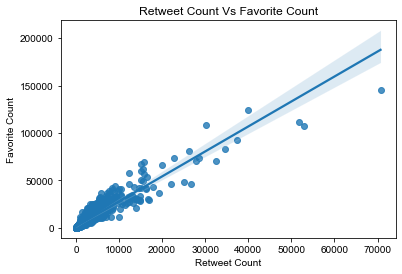

In [5]:
# plt.scatter(twitter_archive_master.retweet_count, twitter_archive_master.favorite_count)
sns.regplot(data = tweet_df, x = "retweet_count", y = "favorite_count")
sns.set(style = "dark")
plt.title('Retweet Count Vs Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.savefig('figure1.png', dpi=100);

In [6]:
tweet_df.groupby('dog_stage').mean()[['rating_numerator']]

rating_numerator
dog_stage                  
doggo             11.619718
floofer           12.666667
pupper            10.575157
puppo             12.111111

In [7]:
tweet_df.groupby('dog_stage').mean()[['retweet_count', 'favorite_count']]

retweet_count  favorite_count
dog_stage                               
doggo        4975.901408    15293.197183
floofer      6811.666667    19553.666667
pupper       1858.331839     6082.502242
puppo        5580.259259    20391.925926

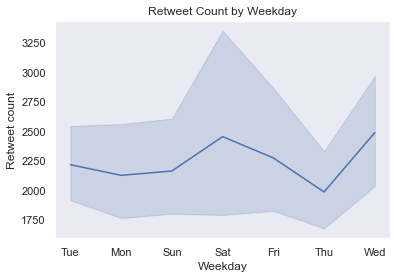

In [8]:
sns.lineplot(data = tweet_df, x = 'weekday', y = 'retweet_count')
sns.set(style = "dark")
plt.title('Retweet Count by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Retweet count')
plt.savefig('figure2.png', dpi=100);

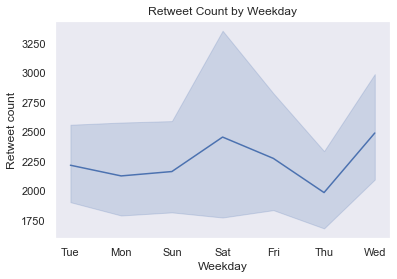

In [60]:
sns.lineplot(data = tweet_df, x = 'weekday', y = 'retweet_count')
sns.set(style = "dark")
plt.title('Retweet Count by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Retweet count')
plt.savefig('figure3.png', dpi=100);

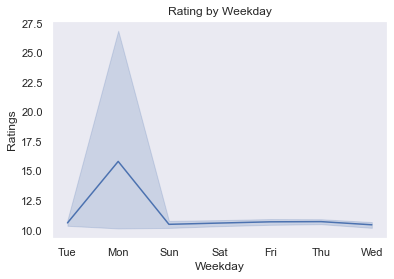

In [61]:
sns.lineplot(data = tweet_df, x = 'weekday', y = 'rating_numerator')
sns.set(style = "dark")
plt.title('Rating by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Ratings')
plt.savefig('figure4.png', dpi=100);

In [59]:
tweet_df[tweet_df['rating_numerator'] >100][['text', 'weekday', 'rating_numerator']]

text  \
718  This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   

    weekday  rating_numerator  
718     Mon            1776.0

In [10]:
first_pred = tweet_df[tweet_df['p1_dog'] == True]
first_pred.p1.value_counts().head()

golden_retriever      138
Labrador_retriever     92
Pembroke               88
Chihuahua              79
pug                    54
Name: p1, dtype: int64

In [23]:
second_pred = tweet_df[tweet_df['p2_dog'] == True]
second_pred.p2.value_counts().head()

Labrador_retriever          96
golden_retriever            81
Cardigan                    72
Chihuahua                   43
Chesapeake_Bay_retriever    40
Name: p2, dtype: int64

In [26]:
third_pred = tweet_df[tweet_df['p3_dog'] == True]
third_pred.p3.value_counts().head()

Labrador_retriever    75
Chihuahua             57
golden_retriever      46
Eskimo_dog            36
kelpie                33
Name: p3, dtype: int64

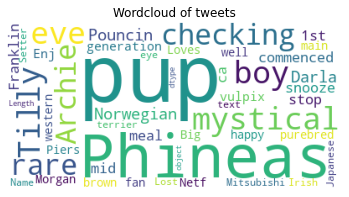

In [5]:
word_cloud = wordcloud.WordCloud(collocations = False, background_color = 'white'). generate(str(tweet_df['text']))
plt.imshow(word_cloud)
plt.title('Wordcloud of tweets')
plt.axis("off")
plt.savefig('figure5.png', dpi=100);

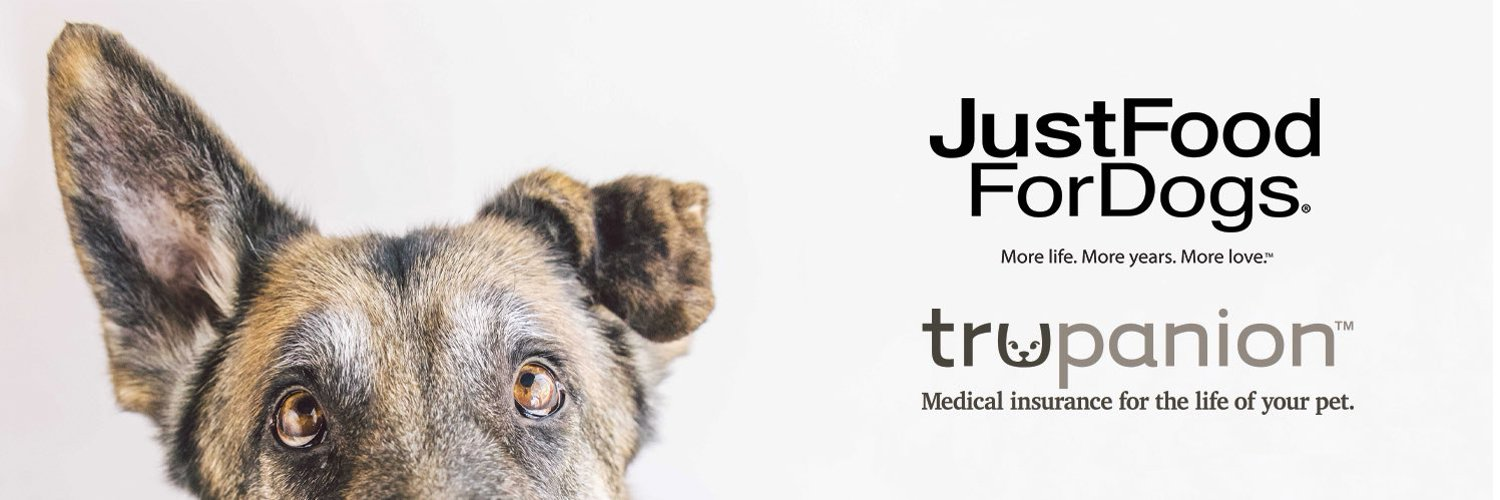